In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')

In [4]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3997692,1565567760,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889


In [56]:
data.corr()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.727978,0.727783,0.728220,0.727981,-0.086029,0.219983,0.727997
Open,0.727978,1.000000,0.999999,0.999998,0.999998,-0.039713,0.361751,0.999999
High,0.727783,0.999999,1.000000,0.999997,0.999998,-0.039494,0.362273,0.999999
Low,0.728220,0.999998,0.999997,1.000000,0.999998,-0.039980,0.361131,0.999999
Close,0.727981,0.999998,0.999998,0.999998,1.000000,-0.039745,0.361676,0.999999
Volume_(BTC),-0.086029,-0.039713,-0.039494,-0.039980,-0.039745,1.000000,0.395642,-0.039752
Volume_(Currency),0.219983,0.361751,0.362273,0.361131,0.361676,0.395642,1.000000,0.361667
Weighted_Price,0.727997,0.999999,0.999999,0.999999,0.999999,-0.039752,0.361667,1.000000


In [16]:
times = data['Timestamp']
numTimes = len(times)

In [8]:
for i in range(1,len(times)):
    if(times[i] != times[i-1]+60):
        print(i)

1585521


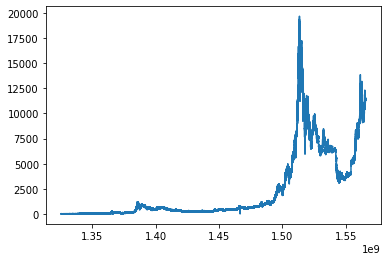

In [14]:
plt.plot(data['Timestamp'],data['Close'])

In [21]:
real_data = data.T.values

In [29]:
trimmed_data = []
nanCount = 0
for i in range(numTimes):
    if(np.isnan(real_data[1][i])):
        nanCount = nanCount + 1
    else:
        trimmed_data.append(real_data.T[i])
        
print(nanCount)

1231878


In [38]:
trimmed_data = np.array(trimmed_data)

In [150]:
numUsedTimes = len(trimmed_data)
train_data = trimmed_data[:int(9*numUsedTimes/10)]
test_data = trimmed_data[int(9*numUsedTimes/10):]
window_size = 2
N_train = len(train_data)
N_test = len(test_data)

In [179]:
def getXY(params, window_size):
    numParams = len(params)
    X = np.zeros(shape=(N_train - window_size, numParams*window_size))
    Y = np.zeros(N_train - window_size)
    for i in range(N_train-window_size):
        for i in range(numParams):
            X[i][window_size*j:window_size*(j+1)] = train_data.T[params[j]][i:i+window_size]
        Y[i] = train_data[i+window_size][1]
    
    X_test = np.zeros(shape=(N_test - window_size, numParams*window_size))
    for i in range(N_test-window_size):
        for i in range(numParams):
            X_test[i][window_size*j:window_size*(j+1)] = test_data.T[params[j]][i:i+window_size]
    
    return X, Y, X_test

In [182]:
def getPredictions(X, Y, X_test, fitted_model, window_size):
    y_pred_train = np.zeros(N_train)
    for i in range(window_size):
        y_pred_train[i] = train_data[i][1]
    
y_pred_train[window_size:] = fitted_model.predict(X_train)

y_pred_test = np.zeros(N_test)

y_pred_test[:window_size] = fitted_model.predict(X_train[len(X_train)-window_size:])
    
y_pred_test[window_size:] = fitted_model.predict(X_test)

return y_pred_train, y_pred_test 

NameError: name 'fitted_model' is not defined

In [46]:
def squared_error(y_pred,y_real):
    return (y_pred-y_real)**2

In [47]:
y_pred_train_0 = np.zeros(N_train)
y_pred_train_0[0] = train_data[0][1]
for i in range(1,N_train):
    y_pred_train_0[i] = train_data[i-1][1]

In [49]:
y_pred_test_0 = np.zeros(N_test)
y_pred_test_0[0] = test_data[0][1]
for i in range(1,N_test):
    y_pred_test_0[i] = test_data[i-1][1]

In [85]:
e_in_0 = sum(squared_error(y_pred_train_0,train_data.T[1]))/N_train
e_out_0 = sum(squared_error(y_pred_test_0,test_data.T[1]))/N_test

In [86]:
print(e_in_0,e_out_0) #baseline errors

63.213155116705735 111.96332227007325


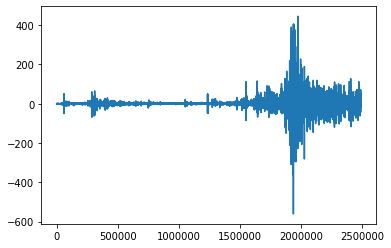

In [54]:
plt.plot(y_pred_train_0-train_data.T[1])

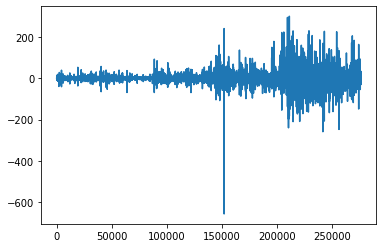

In [55]:
plt.plot(y_pred_test_0-test_data.T[1])

In [106]:
linear_model = LinearRegression()

In [107]:
X_train_1 = np.zeros(shape=(N_train - window_size, window_size))
Y_train_1 = np.zeros(N_train - window_size)
for i in range(N_train-window_size):
    X_train_1[i] = train_data.T[1][i:i+window_size]
    Y_train_1[i] = train_data[i+window_size][1]

In [108]:
X_test_1 = np.zeros(shape=(N_test - window_size, window_size))
Y_test_1 = np.zeros(N_test - window_size)
for i in range(N_test-window_size):
    X_test_1[i] = test_data.T[1][i:i+window_size]
    Y_test_1[i] = test_data[i+window_size][1]

In [109]:
linear_fit_1 = linear_model.fit(X_train_1,Y_train_1)

In [110]:
linear_fit_1.coef_

array([0.03195954, 0.96803796])

In [111]:
y_pred_train_1 = np.zeros(N_train)
for i in range(window_size):
    y_pred_train_1[i] = train_data[i][1]
    
y_pred_train_1[window_size:] = linear_fit_1.predict(X_train_1)

In [112]:
y_pred_test_1 = np.zeros(N_test)

y_pred_test_1[:window_size] = linear_fit_1.predict(X_train_1[len(X_train_1)-window_size:])
    
y_pred_test_1[window_size:] = linear_fit_1.predict(X_test_1)

In [113]:
e_in_1 = sum(squared_error(y_pred_train_1,train_data.T[1]))/N_train
e_out_1 = sum(squared_error(y_pred_test_1,test_data.T[1]))/N_test

In [114]:
print(e_in_1,e_out_1)

63.148501929490486 111.97414091957329


In [115]:
train_data[0]

array([1.32531792e+09, 4.39000000e+00, 4.39000000e+00, 4.39000000e+00,
       4.39000000e+00, 4.55580870e-01, 2.00000002e+00, 4.39000000e+00])

In [151]:
X_train_2 = np.zeros(shape=(N_train - window_size, 3*window_size))
Y_train_2 = np.zeros(N_train - window_size)
for i in range(N_train-window_size):
    X_train_2[i][0:window_size] = train_data.T[1][i:i+window_size]
    X_train_2[i][window_size:2*window_size] = train_data.T[5][i:i+window_size]
    X_train_2[i][2*window_size:3*window_size] = train_data.T[6][i:i+window_size]
    Y_train_2[i] = train_data[i+window_size][1]

In [152]:
X_test_2 = np.zeros(shape=(N_test - window_size, 3*window_size))
Y_test_2 = np.zeros(N_test - window_size)
for i in range(N_test-window_size):
    X_test_2[i][0:window_size] = test_data.T[1][i:i+window_size]
    X_test_2[i][window_size:2*window_size] = test_data.T[5][i:i+window_size]
    X_test_2[i][2*window_size:3*window_size] = test_data.T[6][i:i+window_size]
    Y_test_2[i] = test_data[i+window_size][1]

In [153]:
linear_fit_2 = linear_model.fit(X_train_2,Y_train_2)

In [154]:
linear_fit_2.coef_

array([ 3.25448255e-02,  9.67462419e-01, -1.22052564e-03,  1.15691134e-03,
        4.17953605e-06, -5.19745435e-06])

In [155]:
y_pred_train_2 = np.zeros(N_train)
for i in range(window_size):
    y_pred_train_2[i] = train_data[i][1]
    
y_pred_train_2[window_size:] = linear_fit_2.predict(X_train_2)

y_pred_test_2 = np.zeros(N_test)

y_pred_test_2[:window_size] = linear_fit_2.predict(X_train_2[len(X_train_2)-window_size:])
    
y_pred_test_2[window_size:] = linear_fit_2.predict(X_test_2)

In [156]:
e_in_2 = sum(squared_error(y_pred_train_2,train_data.T[1]))/N_train
e_out_2 = sum(squared_error(y_pred_test_2,test_data.T[1]))/N_test
print(e_in_2,e_out_2)

62.996577673817086 111.5709029435724


In [158]:
#Try one with time differences as a factor
X_train_3 = np.zeros(shape=(N_train - window_size, 4*window_size))
Y_train_3 = np.zeros(N_train - window_size)

X_train_3[0][0:window_size] = train_data.T[1][0:window_size]
X_train_3[0][window_size:2*window_size] = train_data.T[5][0:window_size]
X_train_3[0][2*window_size:3*window_size] = train_data.T[6][0:window_size]
X_train_3[0][3*window_size:4*window_size] = 60

for i in range(1,N_train-window_size):
    X_train_3[i][0:window_size] = train_data.T[1][i:i+window_size]
    X_train_3[i][window_size:2*window_size] = train_data.T[5][i:i+window_size]
    X_train_3[i][2*window_size:3*window_size] = train_data.T[6][i:i+window_size]
    X_train_3[i][3*window_size:4*window_size] = train_data.T[0][i:i+window_size] - train_data.T[0][i-1:i+window_size-1]
    Y_train_3[i] = train_data[i+window_size][1]

In [159]:
X_test_3 = np.zeros(shape=(N_test - window_size, 4*window_size))
Y_test_3 = np.zeros(N_test - window_size)

X_test_3[0][0:window_size] = test_data.T[1][0:window_size]
X_test_3[0][window_size:2*window_size] = test_data.T[5][0:window_size]
X_test_3[0][2*window_size:3*window_size] = test_data.T[6][0:window_size]
X_test_3[0][3*window_size:4*window_size] = test_data.T[0][0:window_size] - train_data.T[0][N_train-window_size:N_train]

for i in range(1,N_test-window_size):
    X_test_3[i][0:window_size] = test_data.T[1][i:i+window_size]
    X_test_3[i][window_size:2*window_size] = test_data.T[5][i:i+window_size]
    X_test_3[i][2*window_size:3*window_size] = test_data.T[6][i:i+window_size]
    X_test_3[i][3*window_size:4*window_size] = test_data.T[0][i:i+window_size] - test_data.T[0][i-1:i+window_size-1]
    Y_test_3[i] = test_data[i+window_size][1]

In [160]:
linear_fit_3 = linear_model.fit(X_train_3,Y_train_3)
linear_fit_3.coef_

array([ 3.25444345e-02,  9.67462869e-01, -1.21983791e-03,  1.15669020e-03,
        4.17946580e-06, -5.19739934e-06, -3.87572044e-06,  1.48847216e-05])

In [161]:
y_pred_train_3 = np.zeros(N_train)
for i in range(window_size):
    y_pred_train_3[i] = train_data[i][1]
    
y_pred_train_3[window_size:] = linear_fit_3.predict(X_train_3)

y_pred_test_3 = np.zeros(N_test)

y_pred_test_3[:window_size] = linear_fit_3.predict(X_train_3[len(X_train_3)-window_size:])
    
y_pred_test_3[window_size:] = linear_fit_3.predict(X_test_3)

In [162]:
e_in_3 = sum(squared_error(y_pred_train_3,train_data.T[1]))/N_train
e_out_3 = sum(squared_error(y_pred_test_3,test_data.T[1]))/N_test
print(e_in_3,e_out_3)

62.9965291061144 111.570910366717


In [164]:
gradient_boost_model = GradientBoostingRegressor()

In [165]:
grad_boost_fit_1 = gradient_boost_model.fit(X_train_3,Y_train_3)

In [166]:
y_pred_train_4 = np.zeros(N_train)
for i in range(window_size):
    y_pred_train_4[i] = train_data[i][1]
    
y_pred_train_4[window_size:] = grad_boost_fit_1.predict(X_train_3)

y_pred_test_4 = np.zeros(N_test)

y_pred_test_4[:window_size] = grad_boost_fit_1.predict(X_train_3[len(X_train_3)-window_size:])
    
y_pred_test_4[window_size:] = grad_boost_fit_1.predict(X_test_3)

In [167]:
e_in_4 = sum(squared_error(y_pred_train_4,train_data.T[1]))/N_train
e_out_4 = sum(squared_error(y_pred_test_4,test_data.T[1]))/N_test
print(e_in_4,e_out_4)

531.0628111756738 1947.524658146108


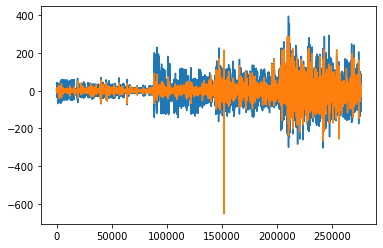

In [173]:
plt.plot(y_pred_test_4-test_data.T[1])
plt.plot(y_pred_test_3-test_data.T[1])

In [174]:
grad_boost_fit_2 = gradient_boost_model.fit(X_train_1,Y_train_1)

In [177]:
y_pred_train_5 = np.zeros(N_train)
for i in range(window_size):
    y_pred_train_5[i] = train_data[i][1]
    
y_pred_train_5[window_size:] = grad_boost_fit_2.predict(X_train_1)

y_pred_test_5 = np.zeros(N_test)

y_pred_test_5[:window_size] = grad_boost_fit_2.predict(X_train_1[len(X_train_1)-window_size:])
    
y_pred_test_5[window_size:] = grad_boost_fit_2.predict(X_test_1)

In [178]:
e_in_5 = sum(squared_error(y_pred_train_5,train_data.T[1]))/N_train
e_out_5 = sum(squared_error(y_pred_test_5,test_data.T[1]))/N_test
print(e_in_5,e_out_5)

530.5833470288304 1947.5424393052592
